# Imports

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from random import randint,random

# Importar dados

## Dados puros

In [44]:
dados = pd.read_csv(r'C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Orientação/Dados/Dados.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Área Inicial                35 non-null     float64
 1   Módulo elástico             35 non-null     int64  
 2   Carga no escoamento         35 non-null     float64
 3   Tensão de escoamento        35 non-null     float64
 4   Dedformação no escoamento   35 non-null     float64
 5   Força máxima                35 non-null     float64
 6   Tensão na força máxima      35 non-null     float64
 7   Deformação na força máxima  35 non-null     float64
 8   Força de ruptura            35 non-null     float64
 9   Deformação na ruptura       35 non-null     float64
 10  Plano                       35 non-null     object 
 11  Plano ID                    35 non-null     int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 3.4+ KB


## Normalizar

In [46]:
from sklearn import preprocessing
cols = list(dados.columns)
x = dados.iloc[:,:-2].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dados_norm = pd.DataFrame(x_scaled)
dados = pd.concat([dados_norm,dados['Plano'],dados['Plano ID']],axis=1,ignore_index=True)
dados.columns = cols
dados.head()

,Área Inicial,Módulo elástico,Carga no escoamento,Tensão de escoamento,Dedformação no escoamento,Força máxima,Tensão na força máxima,Deformação na força máxima,Força de ruptura,Deformação na ruptura,Plano,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,deitado,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,deitado,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,deitado,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,deitado,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,deitado,0


# SMOTE
## Criar 5 pontos para que a classe 45 tenha também 10 pontos

In [47]:
X = dados.drop(['Plano ID','Plano'],axis=1)
y = dados['Plano ID']
dic = {0:10,1:10,2:10,3:10}
sm = SMOTE(random_state=42,k_neighbors=3)
X,y = sm.fit_sample(X, y)
dados = pd.concat([X,y],axis=1)
dados

,Área Inicial,Módulo elástico,Carga no escoamento,Tensão de escoamento,Dedformação no escoamento,Força máxima,Tensão na força máxima,Deformação na força máxima,Força de ruptura,Deformação na ruptura,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,0
5,0.355316,0.503906,0.000000,0.110009,0.000000,0.378571,0.437514,0.816159,0.432432,0.632806,1
6,0.322683,0.398438,0.047619,0.190763,0.327935,0.214286,0.245962,0.538676,0.202703,0.693802,1
7,0.592414,0.125000,0.257143,0.189546,0.538462,0.535714,0.224281,0.757796,0.283784,0.904383,1
8,0.550877,0.167969,0.333333,0.304567,0.668016,0.564286,0.343429,0.715163,0.398649,0.654824,1
9,0.454940,0.109375,0.200000,0.243807,0.611336,0.400000,0.277636,0.824816,0.364865,1.000000,1


## Correlação

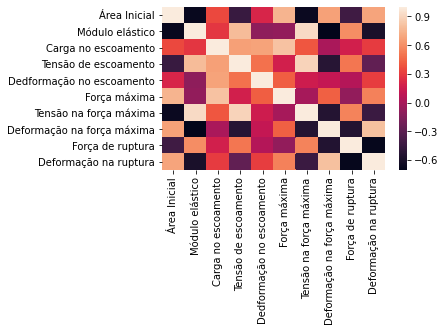

In [7]:
heatmap = sns.heatmap(dados.drop(['Plano','Plano ID'],axis=1).corr())
fig = heatmap.get_figure()
fig.set_size_inches(5, 3)
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Heatmap.png')

## Pairplot

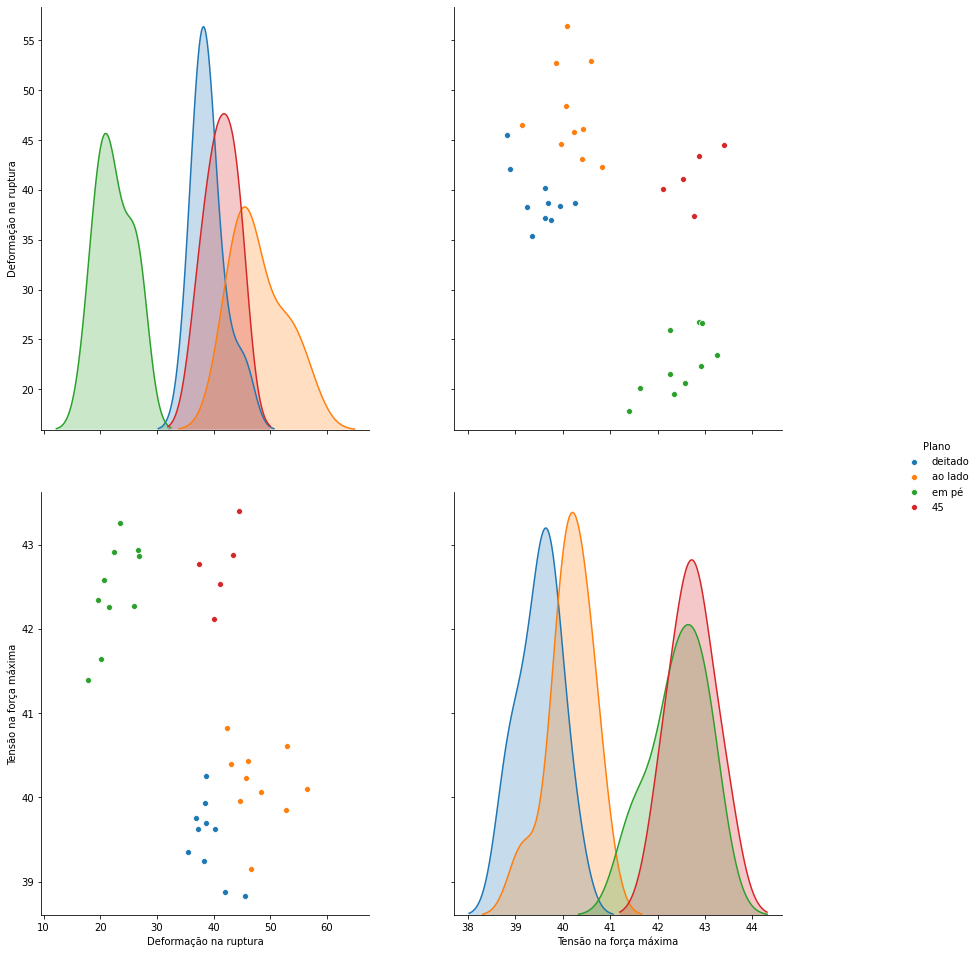

In [10]:
sns.pairplot(dados[['Plano','Deformação na ruptura','Tensão na força máxima']],hue='Plano').fig.set_size_inches(15,15)

## Boxplot

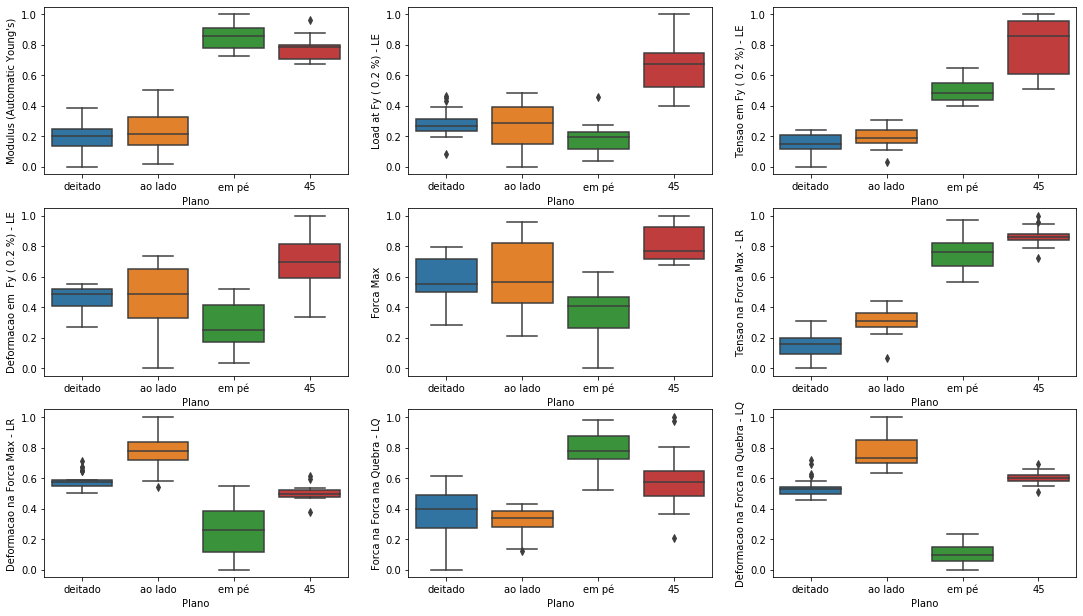

In [339]:
fig,axs=plt.subplots(3,3)
fig.set_size_inches(18.5, 10.5)
cols= dados.columns[1:10]
for i in range(3):
    for j in range(3):
        sns.boxplot(x='Plano',y=cols[i*3+j],data=dados,ax=axs[i][j])
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Boxplot.png')

# Exportar dados normalizados e Balanceados 

In [17]:
dados.to_csv('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Dados/Dados tratados.csv',index=False)